In [61]:
# Loading data from file
import h5py
path = "usps.h5"
with h5py.File(path, 'r') as h:
    train = h.get('train')
    X_tr = train.get('data')[:]
    Y_tr = train.get('target')[:]
    test = h.get('test')
    X_ts = test.get('data')[:]
    Y_ts = test.get('target')[:]

In [62]:
X_ts.shape

(2007, 256)

In [55]:
# Library imports
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [53]:
# Results for Cross Validation (5 splits) & Changing value of k from 1 to 29
from tabulate import tabulate
headers = ["nearest_neighbours", "average cv score"]
values = []
from sklearn.model_selection import KFold, cross_val_score
for k in range(1, 30, 2):
    clf = KNeighborsClassifier(n_neighbors=k)
    k_folds = KFold(n_splits = 5)
    scores = cross_val_score(clf, X_tr, Y_tr, cv = k_folds)

    # print("nearest neighbours: ", k)
    # print("Cross Validation Scores: ", scores)
    # print("Average CV Score: ", scores.mean())
    # print("\n")
    values.append([k, scores.mean()])
print(tabulate(values, headers=headers, tablefmt='orgtbl'))

|   nearest_neighbours |   average cv score |
|----------------------+--------------------|
|                    1 |           0.967357 |
|                    3 |           0.963927 |
|                    5 |           0.95995  |
|                    7 |           0.956521 |
|                    9 |           0.955012 |
|                   11 |           0.952817 |
|                   13 |           0.948977 |
|                   15 |           0.945548 |
|                   17 |           0.943217 |
|                   19 |           0.940885 |
|                   21 |           0.937594 |
|                   23 |           0.936908 |
|                   25 |           0.935124 |
|                   27 |           0.933615 |
|                   29 |           0.93101  |


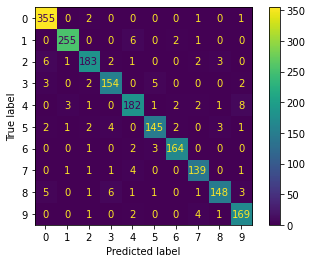

array([[355,   0,   2,   0,   0,   0,   0,   1,   0,   1],
       [  0, 255,   0,   0,   6,   0,   2,   1,   0,   0],
       [  6,   1, 183,   2,   1,   0,   0,   2,   3,   0],
       [  3,   0,   2, 154,   0,   5,   0,   0,   0,   2],
       [  0,   3,   1,   0, 182,   1,   2,   2,   1,   8],
       [  2,   1,   2,   4,   0, 145,   2,   0,   3,   1],
       [  0,   0,   1,   0,   2,   3, 164,   0,   0,   0],
       [  0,   1,   1,   1,   4,   0,   0, 139,   0,   1],
       [  5,   0,   1,   6,   1,   1,   0,   1, 148,   3],
       [  0,   0,   1,   0,   2,   0,   0,   4,   1, 169]])

In [58]:
# Proceeding with best k value of 1.
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_tr, Y_tr)
predictions = model.predict(X_ts)

# Confusion matrix function from sklearn
cm = confusion_matrix(Y_ts, predictions)
 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# Cm array
cm

In [60]:
# Precision and recall
# final classification report demonstrating the accuracy of the classifier for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(Y_ts, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       359
           1       0.98      0.97      0.97       264
           2       0.94      0.92      0.93       198
           3       0.92      0.93      0.92       166
           4       0.92      0.91      0.91       200
           5       0.94      0.91      0.92       160
           6       0.96      0.96      0.96       170
           7       0.93      0.95      0.94       147
           8       0.95      0.89      0.92       166
           9       0.91      0.95      0.93       177

    accuracy                           0.94      2007
   macro avg       0.94      0.94      0.94      2007
weighted avg       0.94      0.94      0.94      2007



In [ ]:
# Sift feature extraction method
